In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('creditcard.csv')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = data.drop('Class',axis = 1)
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = gnb.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy :.4f}")

cm = confusion_matrix(y_test,y_pred)
print("confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report: \n",report)


accuracy: 0.9930
confusion Matrix:
 [[84759   548]
 [   46    90]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.14      0.66      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.83      0.61     85443
weighted avg       1.00      0.99      1.00     85443



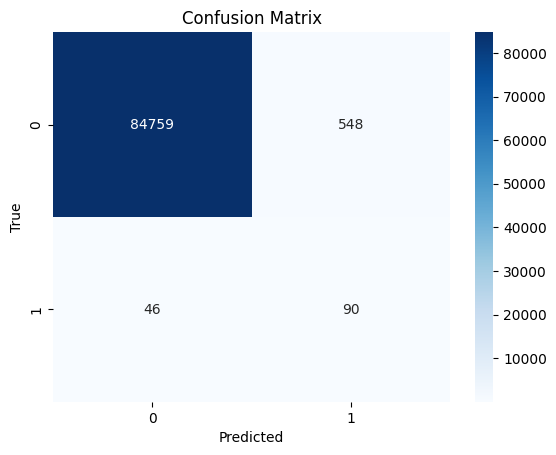

In [9]:
sns.heatmap(cm, annot=True, fmt= 'd', cmap= 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


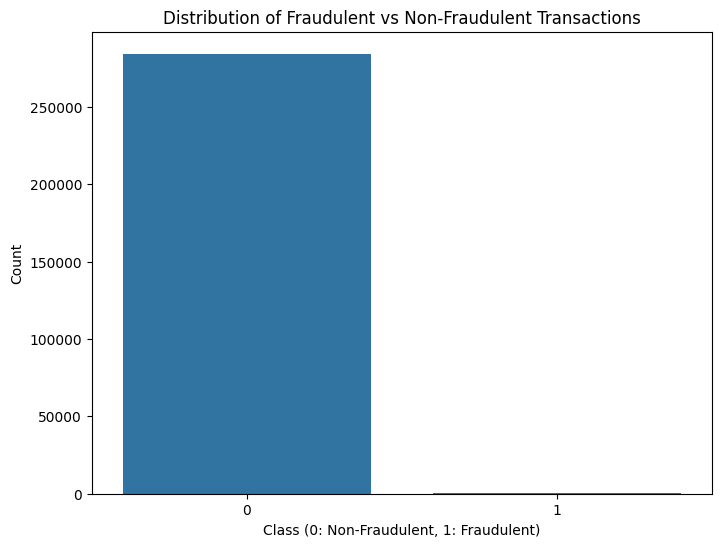

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


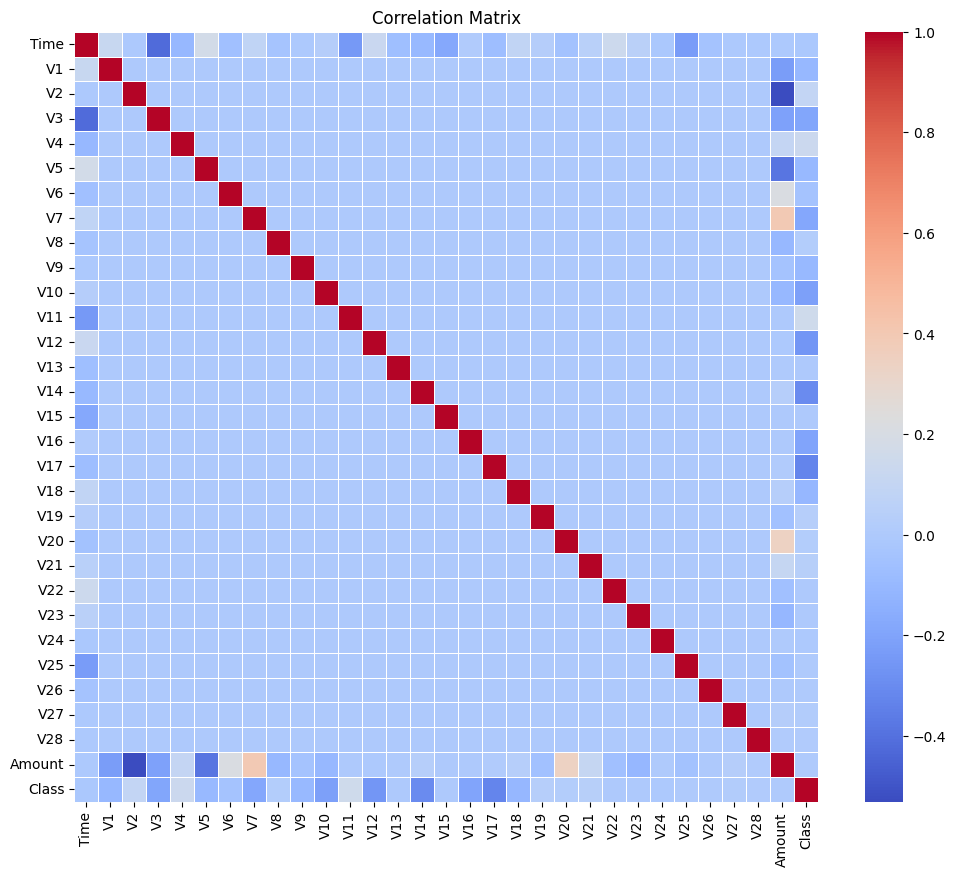

In [12]:

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
